In [1]:
# Load the data
from sklearn.datasets import make_blobs

In [2]:
# create blobs
X,_ = make_blobs(n_samples=1500, n_features=3, centers=3, cluster_std=1.5, random_state=40)

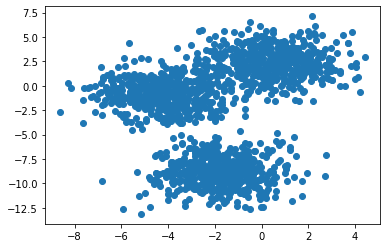

In [3]:
import matplotlib.pyplot as plt
# Check the distribution
plt.scatter(X[:,0],X[:,1])

In [4]:
# Check the features
X[:10]

array([[-3.16061842, -1.20434404, -2.95625149],
       [-1.00579044,  1.38902779,  3.92600972],
       [-4.48597776, -1.85230396, -2.18706173],
       [ 0.88989967,  2.91208238,  5.07578208],
       [-4.93622062, -3.36453113, -1.12226125],
       [-1.52411863, -9.04805234,  7.75689431],
       [-1.37803111,  0.25567437, -3.53566883],
       [-3.06449293,  0.51061156, -6.1987134 ],
       [ 2.39746687,  2.8475443 ,  7.11713668],
       [-1.05691761,  4.56703351,  2.99307713]])

# **Initializing and training the OPTICS**

In [5]:
# Import OPTICS from sklearn
from sklearn.cluster import OPTICS

In [6]:
# Initialize OPTICS
density_cluster = OPTICS(min_samples=100, xi=0.02, min_cluster_size=0.1)

In [7]:
# Train Optics
density_cluster.fit(X)

OPTICS(min_cluster_size=0.1, min_samples=100, xi=0.02)

In [8]:
import pandas as pd
# predicted result
data = pd.DataFrame(X)
data['labels'] = density_cluster.labels_

In [9]:
# clusters labels
data['labels'].value_counts()

 0    503
 1    498
 2    498
-1      1
Name: labels, dtype: int64

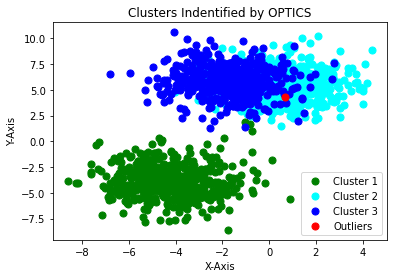

In [10]:
# Plot the clusteers
plt.scatter(X[data['labels']  == 0, 0], X[data['labels']  == 0, 2], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[data['labels']  == 1, 0], X[data['labels']  == 1, 2], s = 50, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[data['labels']  == 2, 0], X[data['labels']  == 2, 2], s = 50, c = 'blue', label = 'Cluster 3')
plt.scatter(X[data['labels']  == -1, 0], X[data['labels']  == -1, 2], s = 50, c = 'red', label = 'Outliers')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.title('Clusters Indentified by OPTICS')
plt.legend()

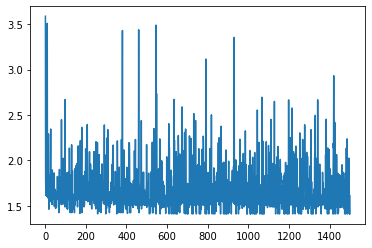

In [11]:
# reachibility plot
plt.plot(density_cluster.reachability_)